# 2. History of the Gaussian Distribution
If you have read any of my other posts, worked with statistics/probability, or any sort of machine learning, there is a very good chance that you have come across the **Gaussian Distribution**. The gaussian distribution, also known as the **Normal Distribution**, has an incredibly large range of uses; we will not talk about them here, however. For that I recommend looking through my other notebooks, digging into the **Central Limit Theorem**, **sampling**, **Gaussian Mixture Models**, distributions in the social sciences, **hypothesis testing**, and so on. 

The purpose of this post is to uncover what bothered me while learning about so many of the above topics: 

> Where did the equation that represents the Gaussian Distribution come from?

For those who are a bit rusty with their recollection of the normal distribution, here are a few key points:
* It is a **continuous** probability distribution.
* It is often used to describe a **random variable** whose distribution is not known, but is thought to represent a gaussian data generating process
* It plays a large role in **statistical inference** based on its use in the central limit theorem.

Mathematically, the Gaussian Distribution is defined as follows:

$$f(x \mid \mu, \sigma^2) = \frac{1}{\sqrt{2 \pi \sigma^2}} exp(-\frac{(x-\mu)^2}{2\sigma^2})$$

Where $\mu$ is the **mean**/**expectation** of the distribution, $\sigma$ is the **standard deviation**, and $\sigma^2$ is the **variance**. If you are rusty on your understanding of the prior term's definitions, I recommend reviewing my previous post. It is worth noting that the normal distribution is parameterized by $\mu$ and $\sigma^2$, and it can be stated verbally as:

> It is a curve representing the probability of observing a specific value of $x$ given $\mu$ and $\sigma^2$.

Visually, it looks like:

In [1]:
import numpy as np
from scipy.stats import bernoulli, binom, norm
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

sns.set(style="white", palette="husl")
sns.set_context("talk")
sns.set_style("ticks")

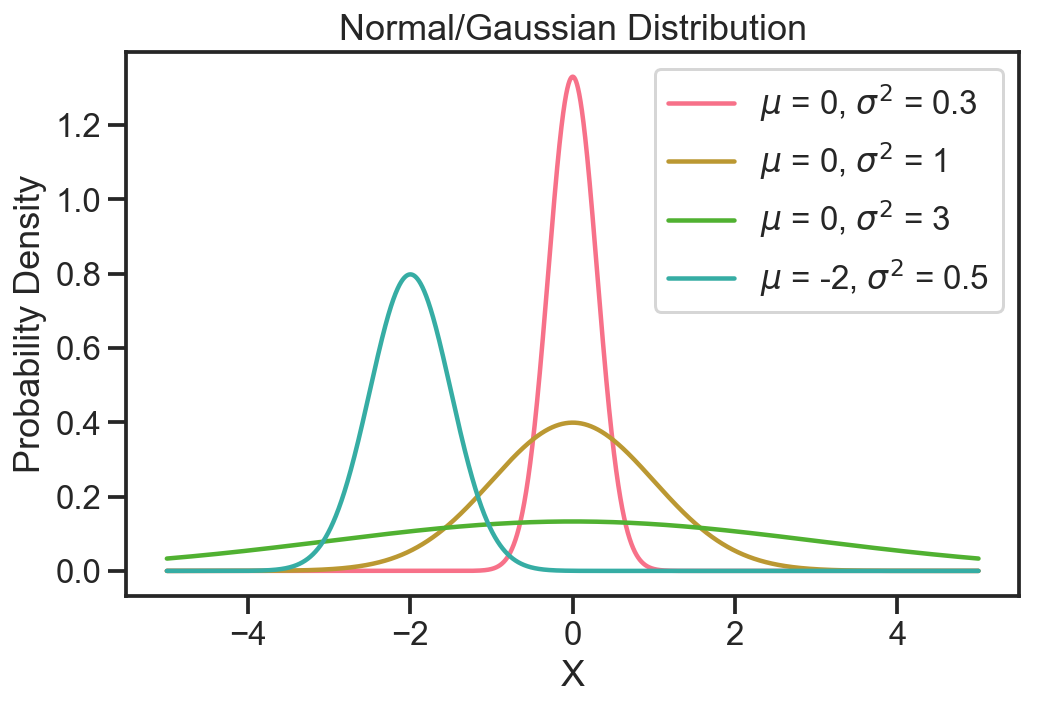

In [2]:
fig = plt.figure(figsize=(8,5))
means = [0, 0, 0, -2]
variances = [0.3, 1, 3, 0.5]
x_axis = np.arange(-5, 5, 0.001)
legend = []
for mu, var in zip(means, variances):
    plt.plot(x_axis, norm.pdf(x_axis,mu,var))
    legend.append(f'$\mu$ = {mu}, $\sigma^2$ = {var}')
plt.xlabel('X')
plt.ylabel('Probability Density')
plt.title('Normal/Gaussian Distribution')
plt.legend(legend)

# plt.savefig('test.png', dpi=200)

plt.show()


Now, the question remains: where on earth did this come from? Upon examination is is clearly a rather complex equation, with an exponential, $\pi$, a square root, square, and so on. Yes it is very useful, but I think that having at least a decent idea of where it came from will only help one when putting it to use. 

## 1. Approximating Discrete Distributions
In the mid 1600's probability theory was in it's infancy. Fermat and Pascal having their [famous correspondance](https://www.amazon.com/Unfinished-Game-Pascal-Fermat-Seventeenth-Century/dp/0465018963), and were considering many different types of problems, one of which dealt with the **Binomial Distribution**. Before we cover the binomial distribution, we are going to go over a special case of it, known as the **Bernoulli Distribution**.

### 1.1 Bernoulli Distribution 
The Bernoulli Distribution is a discrete probability distribution surrounding a **bernoulli random variable**. This is the simplest type of random variable there is, and can only take on two values: $\{0,1\}$. For example, a simple bernoulli random variable would be a coin flip. 

This random variable has the following probability mass function: 

$$f(k \mid p) = 
\left\{
\begin{array}{ll}
  p \;  \hspace{47pt} if \; k =1 \\
  q = 1 - p \hspace{20pt} if \; k = 0\\
\end{array}
\right.
$$

Or, it can also be written as:

$$f(k \mid p) = p^k(1-p)^{1-k}$$

In both equations, $p$ is the probability of success (for instance, the probability of flipping heads), and $k$ represents whether it was a successful trial or not. As an example of how to evaluate the above pmf, consider a coin has a probability of heads of 0.6 (it is biased). The probability of flipping heads ($k=1$):

$$f(1 \mid 0.6) = 0.6^1(0.4)^{1-1} = 0.6$$

And the probability of flipping tails ($k=0$):

$$f(0 \mid 0.6) = 0.6^0(0.4)^{1-0} = 0.4$$

What makes the bernoulli distribution a special case of the binomial distribution is that we are dealing with a **single trial**. In other words the number of trials, $n$, is equal to one. Hence, this distribution will allow us to see the probability of heads given a single coin flip. Visually, we can see this below. On the left we see the frequency of heads across 10,000 single coin tosses, and on the right we see the normalized probabilities.

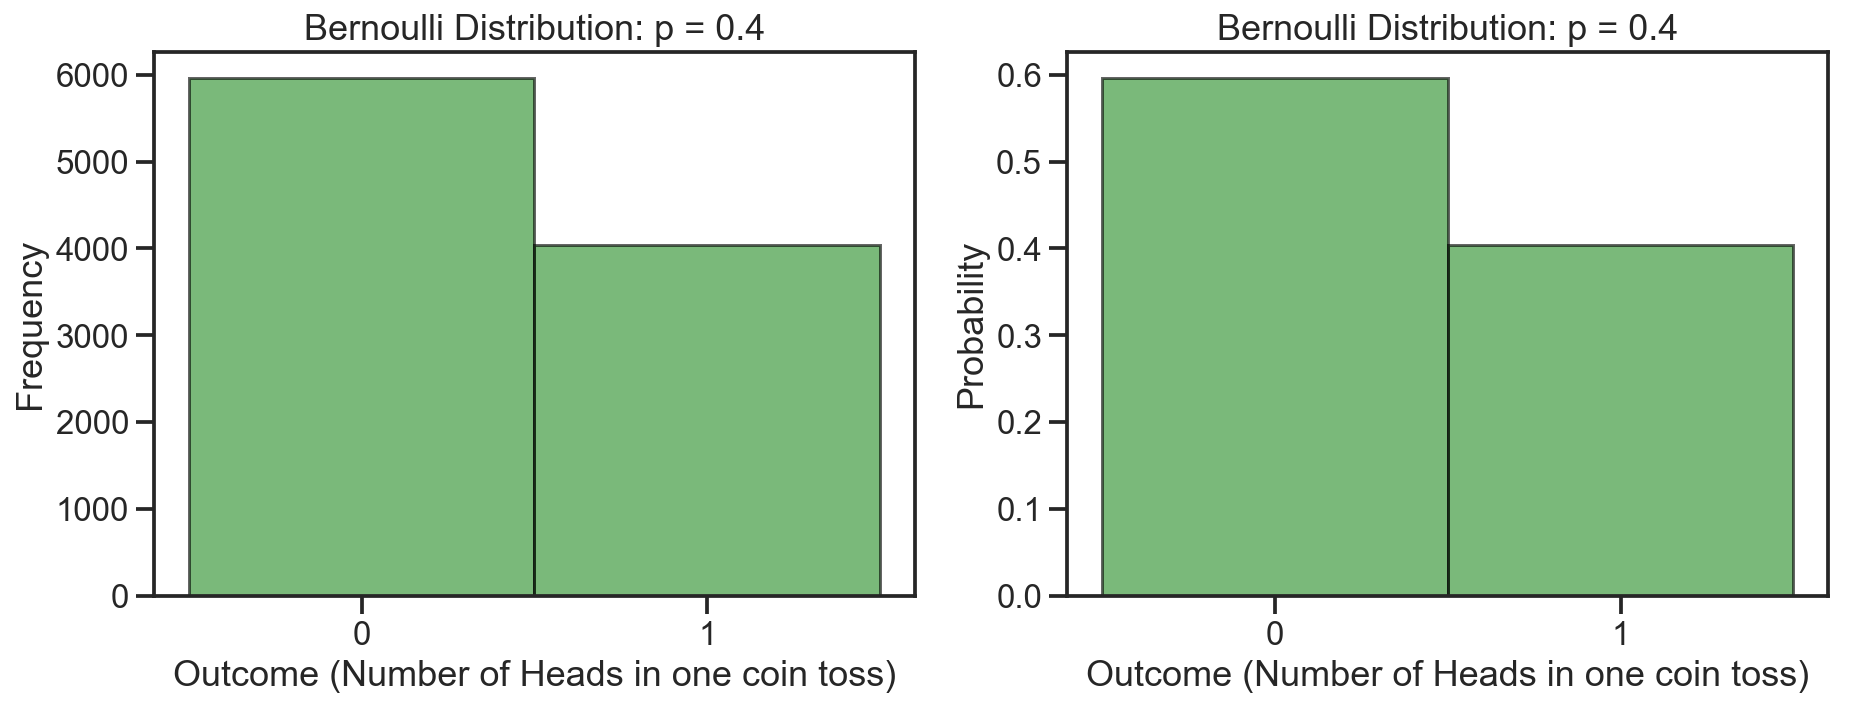

In [40]:
# generate bernoulli, n=1
data_bern = bernoulli.rvs(size=10000,p=0.4)

fig = plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)
ax = plt.hist(
    data_bern,
    bins=[0,1,2],
    density=False,
    rwidth=1,
    color='forestgreen',
    alpha=0.6,
    edgecolor="black"
)

plt.title('Bernoulli Distribution: p = 0.4')
plt.xlabel('Outcome (Number of Heads in one coin toss)')
plt.ylabel('Frequency')
plt.xticks([0.5, 1.5], ['0','1'])

plt.subplot(1, 2, 2)
ax = plt.hist(
    data_bern,
    bins=[0,1,2],
    density=True,
    rwidth=1,
    color='forestgreen',
    alpha=0.6,
    edgecolor="black"
)

plt.title('Bernoulli Distribution: p = 0.4')
plt.xlabel('Outcome (Number of Heads in one coin toss)')
plt.ylabel('Probability')
plt.xticks([0.5, 1.5], ['0','1'])

plt.show()

Above we are shown the frequency of heads when our single trial experiment was repeated 10,000 times. We ended up with ~6,000 heads and ~4,000 tails; exactly what we would expect based on our probabilities! CONTINUE

It should also be apparent that the expected value of our random variable is:

$$E[X] = p$$

Intuitively, I have no doubt that this makes sense. If you know the probability of heads is 0.7, and heads is defined as success (our random variable), then the expectation of our random variable is 0.7. If this is not intuitively clear, please see my previous intro to statistics post. 

However, we can still place some mathematical rigor behind this intuitive outcome, with the following proof below. Note, there will be a slight change in notation: I am now going to represent our bernoulli random variable as $X$ and the outcome as $x$ (no longer $k$). So our probability mass function will look like:

$$P(X = x) = p^x(1-p)^{1-x}$$

Where the outcome $x$ can be either 0 or 1. We will utilize the shorthand for our pmf:

$$P(X=x) = p(x)$$

By definition, the expectation of a discrete random variable $X$ is:

$$E(X) = \sum_x xp(x)$$

In the bernoulli process, there are only two possible outcomes that can occur, $x = \{0, 1\}$:

$$E(X) = 0*p^0(1-p)^{1-0} + 1*p^1(1-p)^{1-1}$$

Above, we are just multiplying 0 times the probability that 0 occurs and adding it to 1 times the probability that 1 occurs. This results in:

$$E(X) = 0(1-p) + 1p = p$$

And there we have it, a quick proof that $E(X) = p$ in the case of a bernoulli random variable $X$. 

Now, it is incredibly important to keep in mind that the random variable in this case is _the number of heads on a single flip_. Recall, a random variable is a function, so our function is literally just the probability of flipping heads if we flip the coin one time. This will be important as we discuss the binomial distribution next. 

### 1.2 Binomial Distribution
Now that we have a good understanding of the bernoulli distribution, we can start dissecting the **binomial distribution**. The binomial distribution is very similar to the bernoulli in that it:
* Is an experiment based on independent trials
* Each trial can have only two possible outcomes

The main difference is that the number of trials, $n$, can now be greater than 1! To make this a bit more clear it helps to think about what random variable we are actually finding the distribution of in this case. We are going to be dealing with the random variable that represents the _number of successes_ in $n$ successive independent trials of a bernoulli experiment.

For example, we may now be looking for the number of heads in $n$ coin flips. This means that if $n=10$, our random variable will take on a value between 0 and 10 (the minimum and maximum number of coin flips). Mathematically the binomial distribution looks like:

$$P(k \mid n, p) = {n\choose k} p^k (1-p)^{n-k}$$

Where ${n\choose k}$ is the **binomial coefficient**:

$${n\choose k} = \frac{n!}{k!(n-k)!}$$

The binomial coefficient is used to take into account the fact that their are multiple ways to pick $k$ unordered outcomes from $n$ possibilities. This is known as a **combination** or **combinatorial number**. For instance, if we were flipping a coin twice, there are multiple ways to get a single head: We could flip heads on the first try and tails on the second, or vice versa; they each result in a single head. 

I also should note that the above is the _probability mass function_, meaning it represents the probability of getting exactly $k$ successes in $n$ trials. The _cumulative distribution function_ on the other hand is defined as:

$$F(k \mid n, p) = P(X \leq k) = \sum_{i=0}^k {n\choose i} p^i (1-p)^{n-i}$$

This summation will come back to be very important later on, so keep it in mind!

With that said, we can also write the pmf definition as follows:

$$P(X=x) = {n\choose k} p^x (1-p)^{n-x}$$

And:

$${n\choose x} = \frac{n!}{x!(n-x)!}$$

Where $x = 0,1,2,...,n$. Depending on whether you have seen the binomial distribution before you may be more comfortable with one or another of the above equations.

What that out of the way, our expected value is updated to reflect the number of flips times the probability of success:

$$E[X] = np$$

As with the bernoulli expectation, this should be rather intuitive. If we flip a coin with a probability of 0.5 for heads 100 times, we would expect to get 50 heads. However, again I find it useful to derive this for good measure. 

We must take into account that a binomial random variable can just be thought of as the sum of $n$ independent Bernoulli random variables, each with a mean $p$ and variance $p(1-p)$. If we let $U_1,...,U_n$ be independent Bernoulli random variables (for example, coin flips), where:

$$E(U_i) = p$$

Hence, our binomial random variable $X$ will be the sum of these bernoulli random variables:

$$X = U_1 + ... + U_n$$

And the expectation of our binomial random variable $X$ is the sum of the $n$ bernoulli random variables: 

$$E(X) = E(U_1 + ... + U_n)$$

We can use the properties of the expectation to show that this is just the sum of the expecations:

$$E(X) = E(U_1) + ... + E(U_n)$$

Remember, each bernoulli random variable $U_i$ has an expectation of $p$! So we are simply adding up $p$ $n$ times:

$$E(X) = \sum_i^n = p_i = np$$

A concrete example will make this more clear. Imagine that our random variable is _the function/process of flipping a coin twice and getting a certain number of heads_. Keep in mind, prior to this our random variable was representing flipping the coin a single time and getting heads. So now we are flipping the coin twice. We want to model the distribution of heads in the outcomes. Our potential outcomes would look like:

|Outcomes|Flip 1|Flip 2|Number of heads (the random variable)|
|--------|------|------|---------------|
|1|Heads|Heads|2|
|2|Heads|Tails|1|
|3|Tails|Heads|1|
|4|Tails|Tails|0|

Again, it is incredibly important to keep in mind that the number of heads is the random variable! In other words, we are modeling a random variable, which we refer to as $X$, that has taken on the values $\{2,1,1,0\}$. We can then look at the frequency of each value of $X$:

|Value of X (number of heads in 2 flips)|Frequency during 4 trials|
|---|---|
|2|1|
|1|2|
|0|1|

This table above is where our distribution is going to come from! Below, I run 10,000 simulations of this process and we end up with exactly what we would have expected! There are 4 possible outcomes as we saw in the table, and the probability zero heads and two heads is 25% (for each), and the probability of flipping one head is 50%. If we divide the frequency (left plot) of observations by the total number of observations, we can normalize this to a standard probability distribution (right plot):

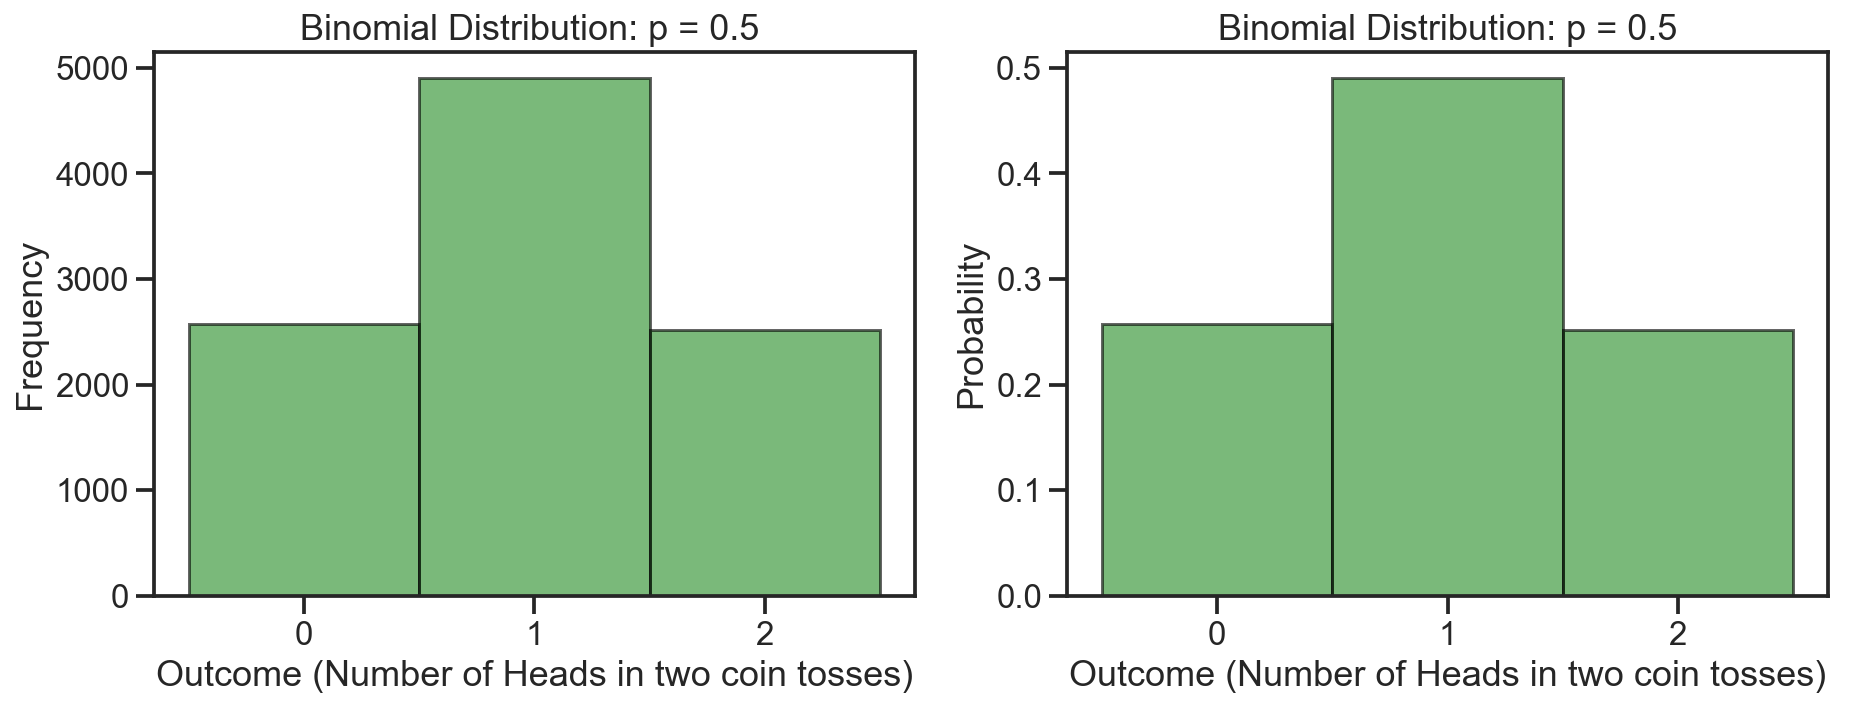

In [41]:
# generate binomial, n=2 
data_binom = binom.rvs(n=2,p=0.5,size=10000)

fig = plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)
ax = plt.hist(
    data_binom,
    bins=[0,1,2,3],
    density=False,
    rwidth=1,
    color='forestgreen',
    alpha=0.6,
    edgecolor="black"
)

plt.title('Binomial Distribution: p = 0.5 ')
plt.xlabel('Outcome (Number of Heads in two coin tosses)')
plt.ylabel('Frequency')
plt.xticks([0.5, 1.5 , 2.5], ['0','1','2'])

plt.subplot(1, 2, 2)
ax = plt.hist(
    data_binom,
    bins=[0,1,2,3],
    density=True,
    rwidth=1,
    color='forestgreen',
    alpha=0.6,
    edgecolor="black"
)

plt.title('Binomial Distribution: p = 0.5')
plt.xlabel('Outcome (Number of Heads in two coin tosses)')
plt.ylabel('Probability')
plt.xticks([0.5, 1.5 , 2.5], ['0','1','2'])

plt.show()

And we can see how the distribution changes as we change the probability of success:

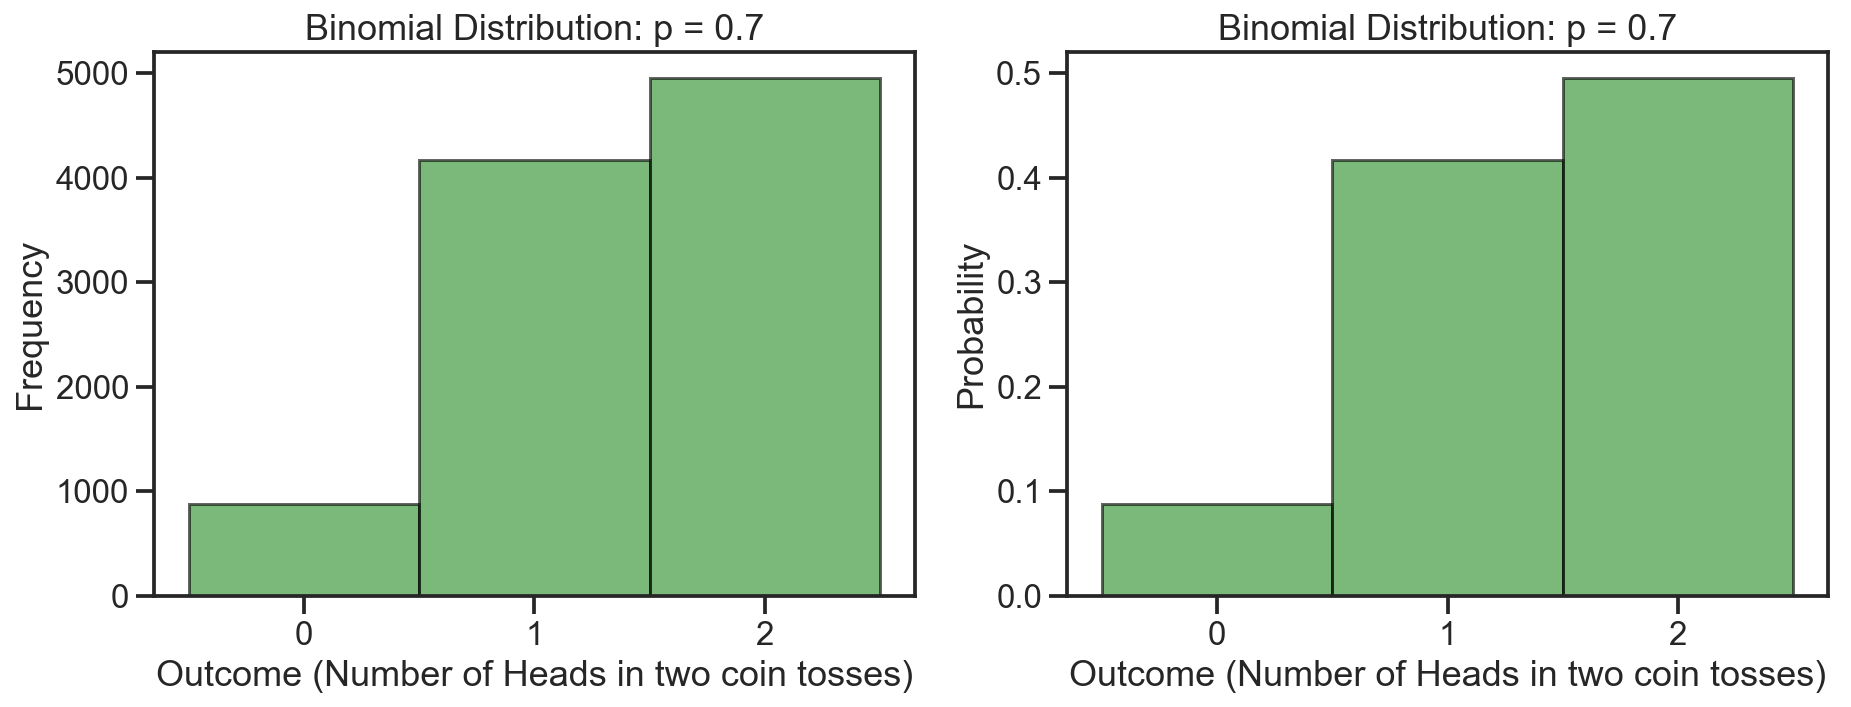

In [42]:
# generate binomial, n=2 
data_binom = binom.rvs(n=2,p=0.7,size=10000)

fig = plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)
ax = plt.hist(
    data_binom,
    bins=[0,1,2,3],
    density=False,
    rwidth=1,
    color='forestgreen',
    alpha=0.6,
    edgecolor="black"
)

plt.title('Binomial Distribution: p = 0.7')
plt.xlabel('Outcome (Number of Heads in two coin tosses)')
plt.ylabel('Frequency')
plt.xticks([0.5, 1.5 , 2.5], ['0','1','2'])

plt.subplot(1, 2, 2)
ax = plt.hist(
    data_binom,
    bins=[0,1,2,3],
    density=True,
    rwidth=1,
    color='forestgreen',
    alpha=0.6,
    edgecolor="black"
)

plt.title('Binomial Distribution: p = 0.7')
plt.xlabel('Outcome (Number of Heads in two coin tosses)')
plt.ylabel('Probability')
plt.xticks([0.5, 1.5 , 2.5], ['0','1','2'])

plt.show()

What is more interesting do, however, is to change the _number of trials_. So far we have looked at the bernoulli distribution where $n=1$ and then a simple case of the binomial where $n=2$. What about the case where $n=5$?  

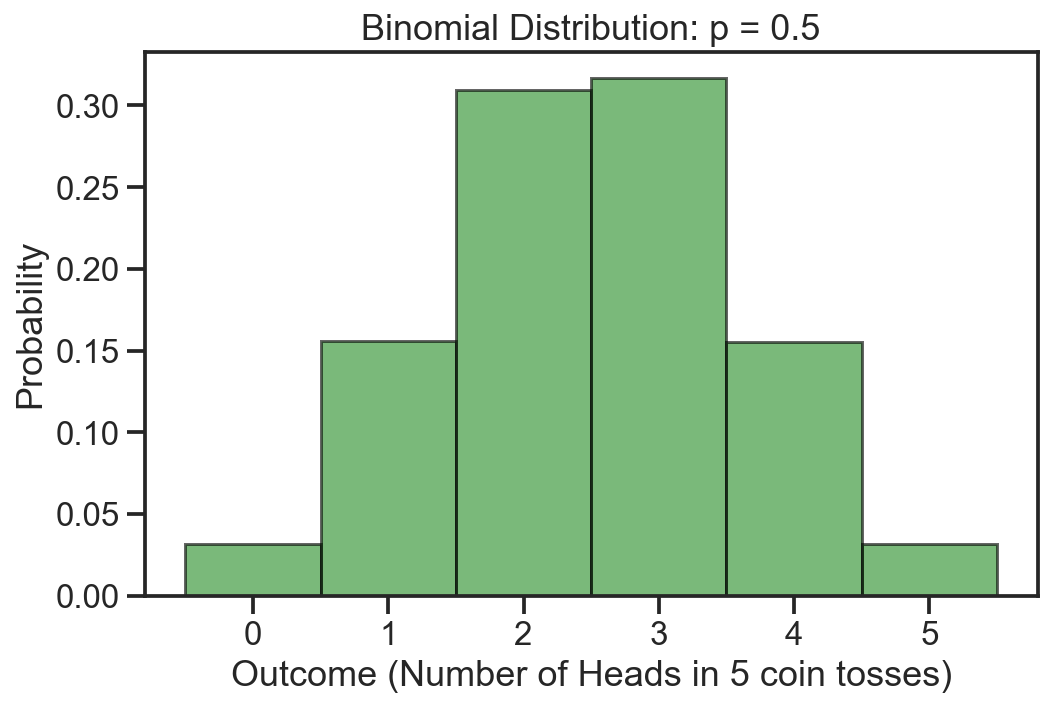

In [43]:
# generate binomial, n=5 
n = 5
data_binom = binom.rvs(n=n,p=0.5,size=10000)
bins = [i for i in range(n+2)]


fig = plt.figure(figsize=(8,5))

ax = plt.hist(
    data_binom,
    bins=bins,
    density=True,
    rwidth=1,
    color='forestgreen',
    alpha=0.6,
    edgecolor="black"
)

plt.title('Binomial Distribution: p = 0.5')
plt.xlabel('Outcome (Number of Heads in 5 coin tosses)')
plt.ylabel('Probability')

xtick_loc = [i + 0.5 for i in range(n+1)]
xtick_val = [i for i in range(n+1)]
plt.xticks(xtick_loc, xtick_val)

plt.show()

It is interesting to take note of the shape that is starting to emerge. Let's look at the case where $n=10$:

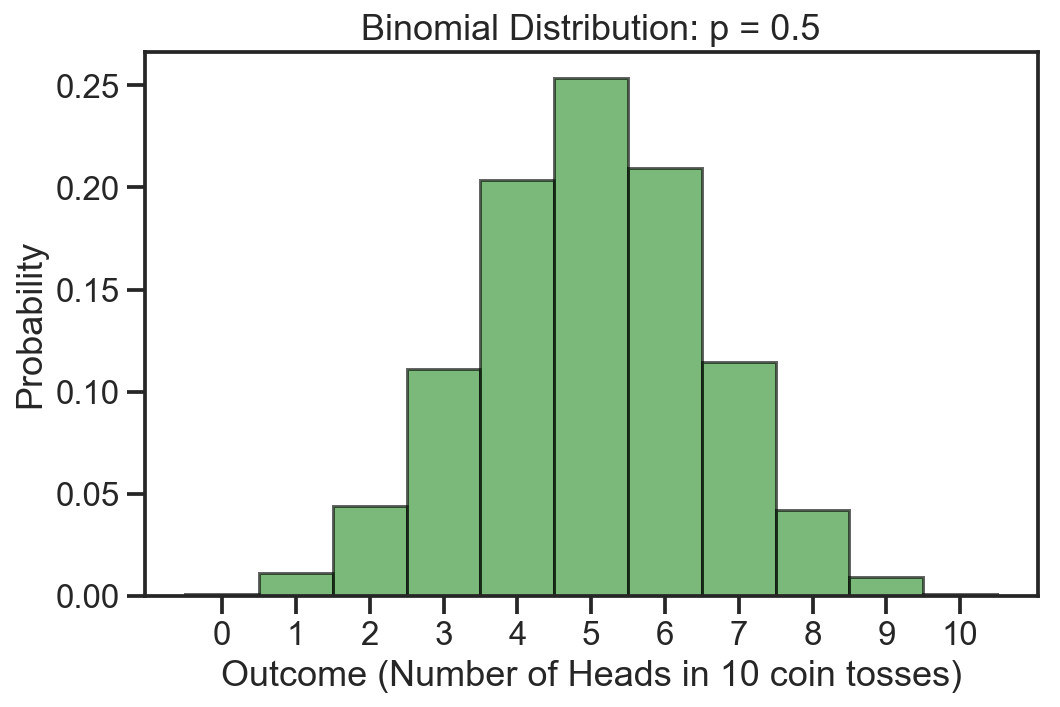

In [44]:
# generate binomial, n=10
n = 10
data_binom = binom.rvs(n=n,p=0.5,size=10000)
bins = [i for i in range(n+2)]


fig = plt.figure(figsize=(8,5))

ax = plt.hist(
    data_binom,
    bins=bins,
    density=True,
    rwidth=1,
    color='forestgreen',
    alpha=0.6,
    edgecolor="black"
)

plt.title('Binomial Distribution: p = 0.5')
plt.xlabel('Outcome (Number of Heads in 10 coin tosses)')
plt.ylabel('Probability')

xtick_loc = [i + 0.5 for i in range(n+1)]
xtick_val = [i for i in range(n+1)]
plt.xticks(xtick_loc, xtick_val)

plt.show()

This should be starting to look more and more familiar to the normal distribution that we looked at earlier and that you have surely seen in the past. Let's check $n=25$ and $n=50$:

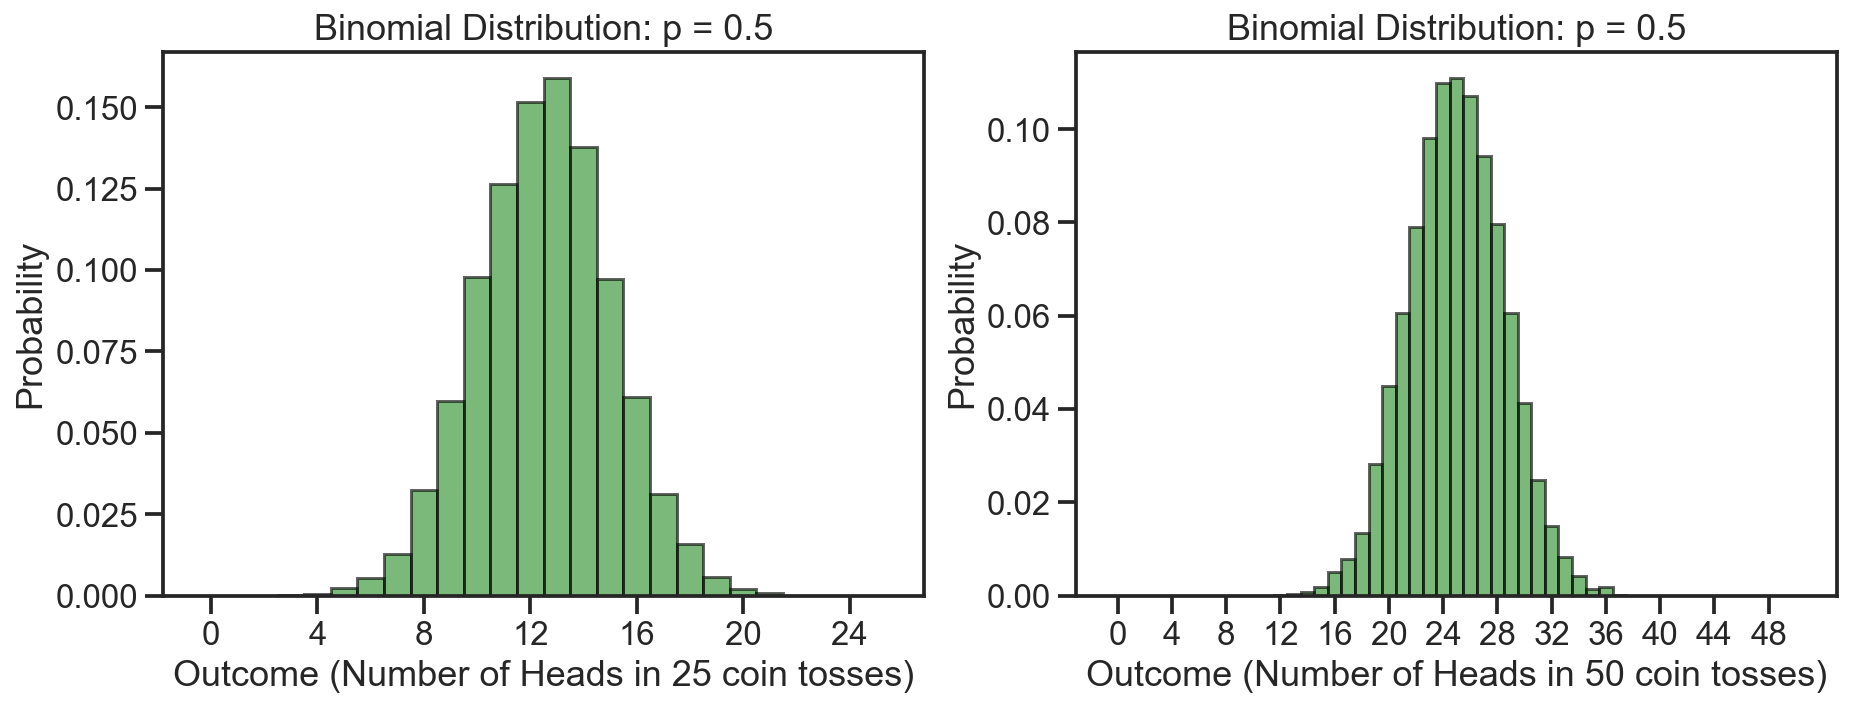

In [45]:
# generate binomial, n=25
fig = plt.figure(figsize=(15,5))
n = 25
data_binom = binom.rvs(n=n,p=0.5,size=10000)
bins = [i for i in range(n+2)]

plt.subplot(1, 2, 1)

ax = plt.hist(
    data_binom,
    bins=bins,
    density=True,
    rwidth=1,
    color='forestgreen',
    alpha=0.6,
    edgecolor="black"
)

plt.title('Binomial Distribution: p = 0.5')
plt.xlabel('Outcome (Number of Heads in 25 coin tosses)')
plt.ylabel('Probability')

xtick_loc = [i + 0.5 for i in range(n+1) if i % 4 == 0]
xtick_val = [i for i in range(n+1) if i % 4 == 0]
plt.xticks(xtick_loc, xtick_val)

# generate binomial, n=50
n = 50
data_binom = binom.rvs(n=n,p=0.5,size=10000)
bins = [i for i in range(n+2)]

plt.subplot(1, 2, 2)

ax = plt.hist(
    data_binom,
    bins=bins,
    density=True,
    rwidth=1,
    color='forestgreen',
    alpha=0.6,
    edgecolor="black"
)

plt.title('Binomial Distribution: p = 0.5')
plt.xlabel('Outcome (Number of Heads in 50 coin tosses)')
plt.ylabel('Probability')

xtick_loc = [i + 0.5 for i in range(n+1) if i % 4 == 0]
xtick_val = [i for i in range(n+1) if i % 4 == 0]
plt.xticks(xtick_loc, xtick_val)

plt.show()

### 1.3 Approximating the Binomial Distribution
This is beginning to look very close to the normal distribution! We can even overlay the theoretical normal distribution on top of each of these plots to show what a great approximation to the binomial distribution the normal is:

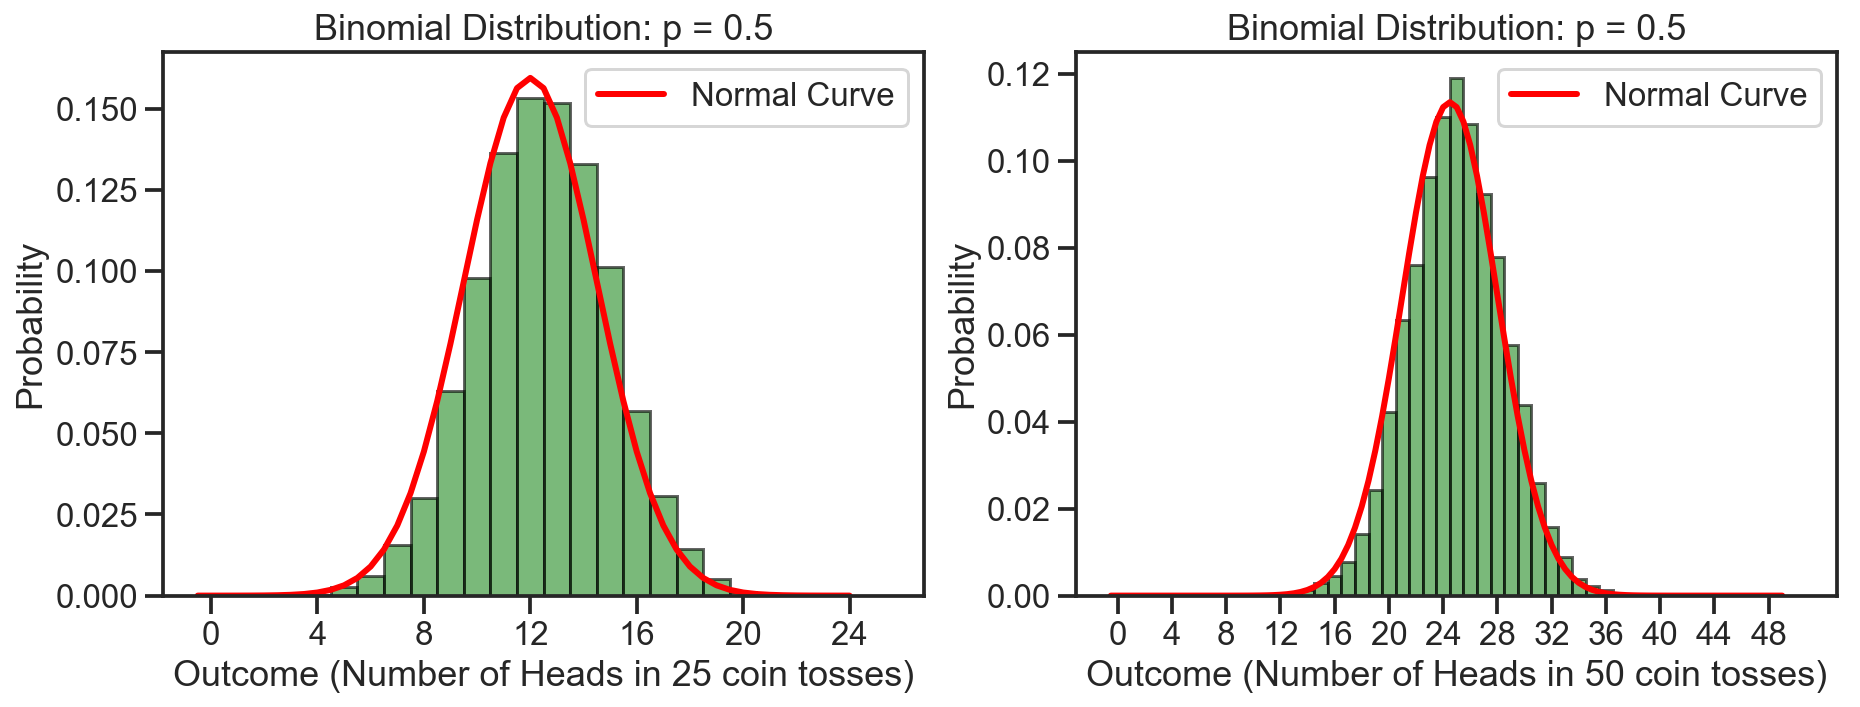

In [46]:
# generate binomial, n=25
fig = plt.figure(figsize=(15,5))
n = 25
data_binom = binom.rvs(n=n,p=0.5,size=10000)
bins = [i for i in range(n+2)]

plt.subplot(1, 2, 1)

ax = plt.hist(
    data_binom,
    bins=bins,
    density=True,
    rwidth=1,
    color='forestgreen',
    alpha=0.6,
    edgecolor="black"
)

plt.title('Binomial Distribution: p = 0.5')
plt.xlabel('Outcome (Number of Heads in 25 coin tosses)')
plt.ylabel('Probability')

xtick_loc = [i + 0.5 for i in range(n+1) if i % 4 == 0]
xtick_val = [i for i in range(n+1) if i % 4 == 0]
plt.xticks(xtick_loc, xtick_val)
x = np.arange(0, 25, 0.5)
p = norm.pdf(x, 12.5, data_binom.std())
plt.plot(x, p, 'k', linewidth=3, c='r')
plt.legend(['Normal Curve'])

# generate binomial, n=50
n = 50
data_binom = binom.rvs(n=n,p=0.5,size=10000)
bins = [i for i in range(n+2)]

plt.subplot(1, 2, 2)

ax = plt.hist(
    data_binom,
    bins=bins,
    density=True,
    rwidth=1,
    color='forestgreen',
    alpha=0.6,
    edgecolor="black"
)

plt.title('Binomial Distribution: p = 0.5')
plt.xlabel('Outcome (Number of Heads in 50 coin tosses)')
plt.ylabel('Probability')

xtick_loc = [i + 0.5 for i in range(n+1) if i % 4 == 0]
xtick_val = [i for i in range(n+1) if i % 4 == 0]
plt.xticks(xtick_loc, xtick_val)
x = np.arange(0, 50, 0.5)
p = norm.pdf(x, 25, data_binom.std())
plt.plot(x, p, 'k', linewidth=3, c='r')
plt.legend(['Normal Curve'])

plt.show()

Now, this is a big idea! Simply put:

> The normal distrubtion came about as a way to utilize a continuous distribution to approximate the discrete binomial distribution.

The binomial distrubtion suffered from many computational challenges, something very common when dealing with summations of the type seen in the cumulative distribution function shown earlier: 

$$F(k \mid n, p) = P(X \leq k) = \sum_{i=0}^k {n\choose i} p^i (1-p)^{n-i}$$

These computational challenges meant that mathematicians began searching for **approximations**. In a sense, we can view that situation as follows: mathematicians _had access to the green discrete distribution above_ and they wanted to find the red function that could be used to approximate it. Now before we dig into how exactly they did that, we need to take a quick aside to talk about function transformations.

#### Function Transformations
I would highly recommend anyone who has made it this far go to my post on **composition of functions**. It goes through a more visual intuition of how you can end up creating a bell shaped curve. It will make the math that is about to follow more easily digestable, and even more importantly it more fundamental to understand (in my humble opinion). 

With that said, we can now move onto the derivation behind the normal distribution. 

## 2. The Normal Distribution
In 1850 astronomer John Herschel gave an incredibly compelling derivation of the normal distribution. For more history surrounding the derivation and all that lead to it, I highly recommend reading [this article](https://www.maa.org/sites/default/files/pdf/upload_library/22/Allendoerfer/stahl96.pdf), which goes into wonderful detail of the entire subject. 

We will go through Herschel's derivation, making a point to dig into the weeds where necessary. This may be review for some, while treading into uncharted waters for others; no matter! The main goal here is to provide an accessible derivation of one of the most widely used functions in the history of mathematics. And with that, let's begin. 

### 2.1 Normal Distribution Derivation
To begin, let's imagine that we have been playing darts for a long period of time. Intuitively, it is clear that we are more likely to find a dart's location to be close to the bullseye (the origin of our x-y axis), shown below:

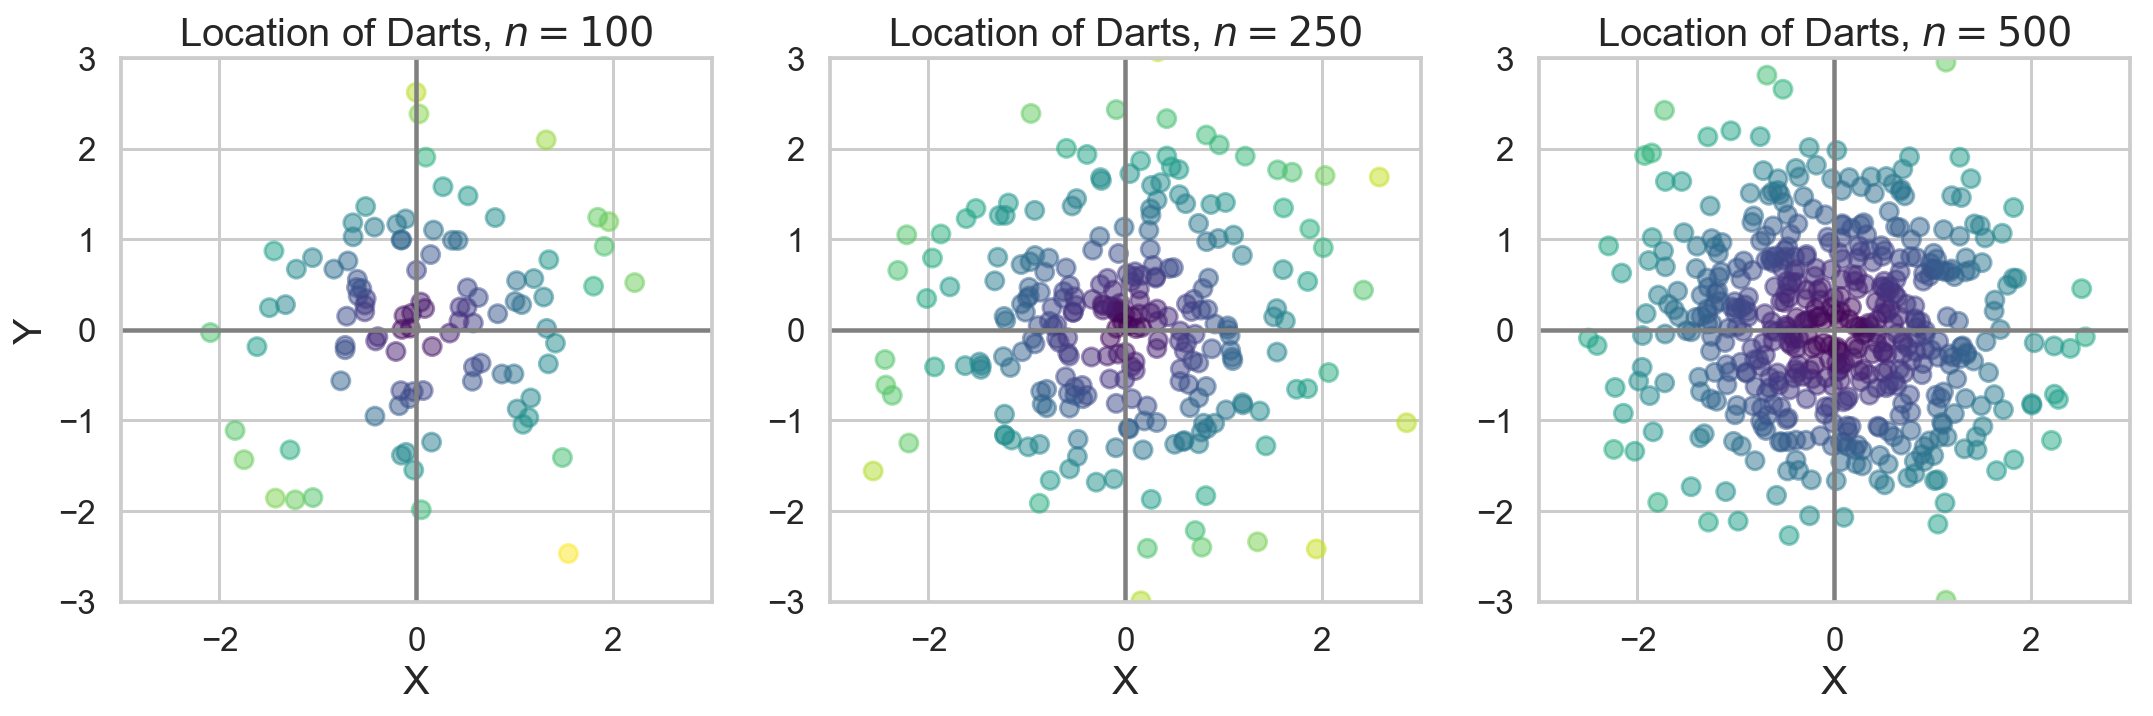

In [167]:
sns.set_style("whitegrid")

rng = np.random.RandomState(0)

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18,5))

sample_size = [100, 250, 500]
mean = [0,0]
cov = [[1, 0], [0, 1]]

# Subplot 1
ax1.axhline(y=0, color='grey')
ax1.axvline(x=0, color='grey')
ax1.set_xlim(-3, 3)                               
ax1.set_ylim(-3, 3) 

# Data for subplot 1
x, y = np.random.multivariate_normal(mean, cov, sample_size[0]).T
colors = np.sqrt(x**2 + y**2)

ax1.scatter(x, y, c=colors, alpha=0.5,
            cmap='viridis')
ax1.set_title('Location of Darts, $n = 100$', fontsize=20)
ax1.set_xlabel('X', fontsize=20)
ax1.set_ylabel('Y', fontsize=20)

# Subplot 2
ax2.axhline(y=0, color='grey')
ax2.axvline(x=0, color='grey')
ax2.set_xlim(-3, 3)                               
ax2.set_ylim(-3, 3) 

# Data for subplot 2
x, y = np.random.multivariate_normal(mean, cov, sample_size[1]).T
colors = np.sqrt(x**2 + y**2)

ax2.scatter(x, y, c=colors, alpha=0.5,
            cmap='viridis')
ax2.set_title('Location of Darts, $n = 250$', fontsize=20)
ax2.set_xlabel('X', fontsize=20)

# Subplot 3
ax3.axhline(y=0, color='grey')
ax3.axvline(x=0, color='grey')
ax3.set_xlim(-3, 3)                               
ax3.set_ylim(-3, 3) 

# Data for subplot 3
x, y = np.random.multivariate_normal(mean, cov, sample_size[2]).T
colors = np.sqrt(x**2 + y**2)

ax3.scatter(x, y, c=colors, alpha=0.5,
            cmap='viridis')
ax3.set_title('Location of Darts, $n = 500$', fontsize=20)
ax3.set_xlabel('X', fontsize=20)

plt.show()

We can see that the darts have clustered near the center, and as we move further away we see fewer and fewer darts. We also see that as we increase our sample size ($n$, the number of dart throws), our clustering around the origin becomes more and more apparent. 

Now, we can define our goal as follows:

> **Goal**: Find a function that yields the probability of finding a dart in a specific location. 

In order to do that, we will define a probability density function, $\phi$. Realize that at this point we have taken a problem that was one dimensional and transitioned to solving a problem that is in two dimesions; that is okay! I have done this on purpose for reasons that will be clear soon. 

Now, $\phi$ is going to take in a point $(x,y)$ on this 2-d board and yield the relative probability of finding a dart near that point. The probability of finding a point in a very small 2-dimensional box, $dA$, will be the coordinates describing the location of the box, $(x,y)$, plugged into our probability density function $\phi$, times the area of the box:

$$\phi(x,y) dA$$

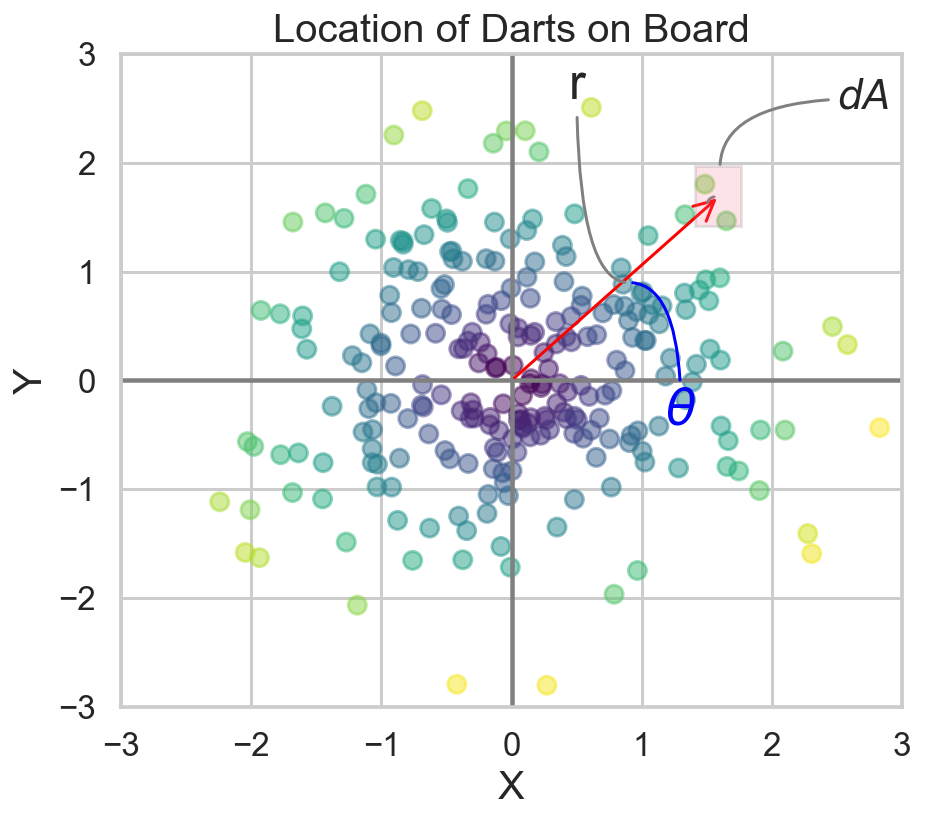

In [207]:
fig, ax = plt.subplots(figsize=(7,6))

ax.axhline(y=0, color='grey')
ax.axvline(x=0, color='grey')
ax.set_xlim(-3, 3)                               
ax.set_ylim(-3, 3) 

x, y = np.random.multivariate_normal(mean, cov, sample_size[1]).T
colors = np.sqrt(x**2 + y**2)

plt.scatter(x, y, c=colors, alpha=0.5,
            cmap='viridis')

# Arrow
ax.annotate(
    '',
    xytext=(0,0), xy=(1.6, 1.7),
    arrowprops=dict(color='red',arrowstyle="->"),
    size=25, ha='center', va='bottom',
)

# r
ax.annotate(
    'r',
    xytext=(0.5,2.5), xy=(0.9, 0.9),
    arrowprops=dict(color='grey',arrowstyle="-", connectionstyle="angle3,angleA=-90,angleB=0"),
    size=25, ha='center', va='bottom',
)

# theta
ax.annotate(
    r'$\theta$', color='blue',
    xytext=(1.3,-.5), xy=(0.9, 0.9),
    arrowprops=dict(color='blue',arrowstyle="-", connectionstyle="angle3,angleA=-90,angleB=0"),
    size=25, ha='center', va='bottom',
)

# dA box
ax.annotate(
    '  ',
    xy=(1.5, 1.6),
    xytext=(1.5, 1.6),
    arrowprops=dict(
        color='grey',
        arrowstyle="-",
        connectionstyle="angle3,angleA=0,angleB=-90"
    ),
    bbox=dict(boxstyle="square", alpha=0.2, ec="gray"),
    size=20,
)

# dA label
ax.annotate(
    r'$dA$',
    xy=(1.6, 1.95),
    xytext=(2.5, 2.5),
    arrowprops=dict(
        color='grey',
        arrowstyle="-",
        connectionstyle="angle3,angleA=0,angleB=-90"
    ),
    size=20,
)

ax.set_title('Location of Darts on Board', fontsize=20)
ax.set_xlabel('X', fontsize=20)
ax.set_ylabel('Y', fontsize=20)
plt.show()

There are several features of this function $\phi$ that we can intuit relatively easily:
1. If we input coordinates close the origin, we should get relatively high values for $\phi$
2. If we input coordinates further away from the origin (the bullseye) we should get lower values for $\phi$
3. Integrating over all $X$ and $Y$ from $[-\infty, \infty ]$ should yield 1. This is because the probability of finding a dart if it is thrown should be 1 (in other words, a dart cannot just vanish into thin air)
4. $\phi$ only cares about the distance away from the origin, and is not dependent on the angle, $\theta$, made with the x-axis. This can be illustrated below:

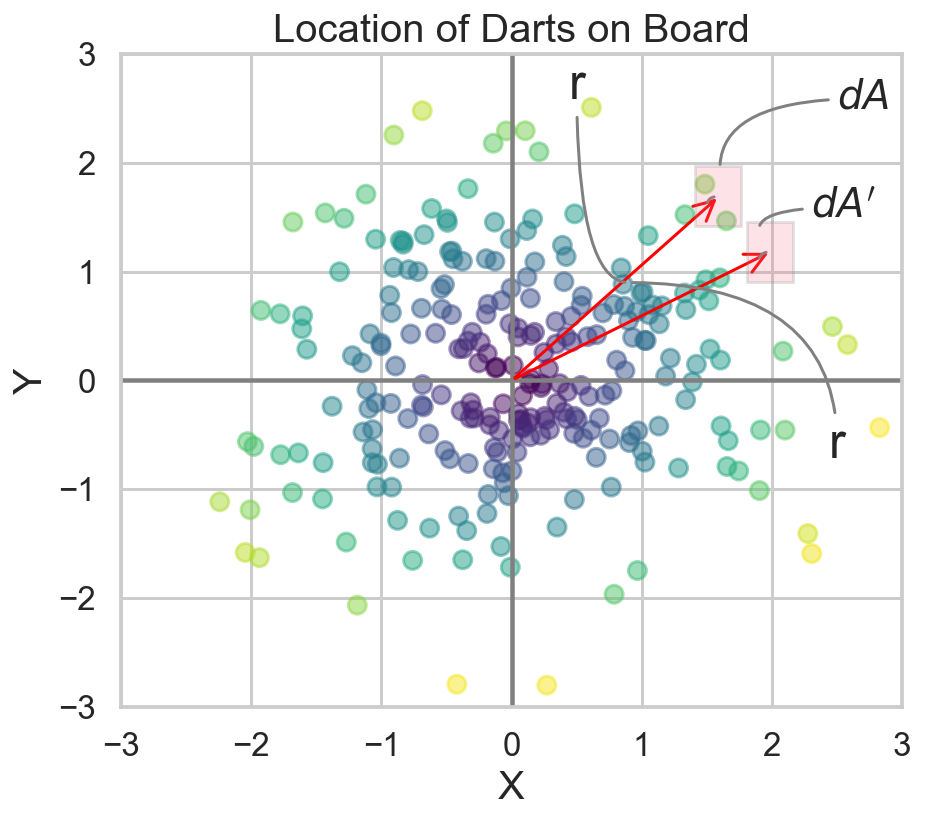

In [232]:
fig, ax = plt.subplots(figsize=(7,6))

ax.axhline(y=0, color='grey')
ax.axvline(x=0, color='grey')
ax.set_xlim(-3, 3)                               
ax.set_ylim(-3, 3) 

# x, y = np.random.multivariate_normal(mean, cov, sample_size[1]).T
# colors = np.sqrt(x**2 + y**2)

plt.scatter(x, y, c=colors, alpha=0.5,
            cmap='viridis')

# Arrow 1
ax.annotate(
    '',
    xytext=(0,0), xy=(1.6, 1.7),
    arrowprops=dict(color='red',arrowstyle="->"),
    size=25, ha='center', va='bottom',
)

# r1
ax.annotate(
    'r',
    xytext=(0.5,2.5), xy=(0.9, 0.9),
    arrowprops=dict(color='grey',arrowstyle="-", connectionstyle="angle3,angleA=-90,angleB=0"),
    size=25, ha='center', va='bottom',
)

# dA box 1
ax.annotate(
    '  ',
    xy=(1.5, 1.6),
    xytext=(1.5, 1.6),
    arrowprops=dict(
        color='grey',
        arrowstyle="-",
        connectionstyle="angle3,angleA=0,angleB=-90"
    ),
    bbox=dict(boxstyle="square", alpha=0.2, ec="gray"),
    size=20,
)

# dA label 1
ax.annotate(
    r'$dA$',
    xy=(1.6, 1.95),
    xytext=(2.5, 2.5),
    arrowprops=dict(
        color='grey',
        arrowstyle="-",
        connectionstyle="angle3,angleA=0,angleB=-90"
    ),
    size=20,
)


# Arrow2
ax.annotate(
    '',
    xytext=(0,0), xy=(2, 1.19),
    arrowprops=dict(color='red',arrowstyle="->"),
    size=25, ha='center', va='bottom',
)

# r2
ax.annotate(
    'r',
    xytext=(2.5,-0.8), xy=(0.9, 0.9),
    arrowprops=dict(color='grey',arrowstyle="-", connectionstyle="angle3,angleA=-90,angleB=0"),
    size=25, ha='center', va='bottom',
)

# dA box 2
ax.annotate(
    '  ',
    xy=(1.9, 1.09),
    xytext=(1.9, 1.09),
    arrowprops=dict(
        color='grey',
        arrowstyle="-",
        connectionstyle="angle3,angleA=0,angleB=-90"
    ),
    bbox=dict(boxstyle="square", alpha=0.2, ec="gray"),
    size=20,
)

# dA label 2
ax.annotate(
    r'$dA ^\prime$',
    xy=(1.9, 1.39),
    xytext=(2.3, 1.5),
    arrowprops=dict(
        color='grey',
        arrowstyle="-",
        connectionstyle="angle3,angleA=0,angleB=-90"
    ),
    size=20,
)

ax.set_title('Location of Darts on Board', fontsize=20)
ax.set_xlabel('X', fontsize=20)
ax.set_ylabel('Y', fontsize=20)
plt.show()

What we are really saying about the function $\phi$ is that it is **rotationality symmetric**. Because $\phi$ is only dependent on $r$, we can write it as:

$$\phi(r) dA$$

### 2.1.1 Solving for general class of function

We have been talking about polar coordinates up until this point, but we need to keep in mind that each box shown above has an $x$ coordinate and $y$ coordinate in the cartesian space. So, the next assumption that we are going to make is that the $x$ and $y$ dimensions are statistically independent. That is to say that the $x$ coordinate tells us nothing about the $y$ coordinate. This statistical independence allows us to express our probability in another way: 

$$\phi(r) dA = f(x)f(y)dA$$

In english the above just says that $\phi(r) dA$ is equal to a new probability density function $f$ taking in $x$, times this new pdf $f$ taking in $y$ times $dA$. The reason for the multiplication is because we are assuming statistical independence. The reason that we use $f$ to operate on both $x$ and $y$ is because there is no special distinction between $x$ and $y$. At this point we can cancel out the $dA$'s and reveal the equality between of probability density functions:

$$\phi(r) = f(x)f(y)$$

Recall, that in polar coordinates:

$$r = \sqrt{x^2 + y^2}$$

Hence, we can write:

$$\phi\big(\sqrt{x^2 + y^2}\big) = f(x)f(y)$$

You may be thinking that we are currently building up a large number of unknowns and functions, making things more complicated at each step. However, that is the beauty of this proof! There is a precise relationship between $\phi$ and $f$ that makes this process worth while! Let's set $y=0$. This is completely fine because if the above statement is true in general it obviously must be true in a specific case, namely where $y=0$:

$$\phi\big(\sqrt{x^2 + 0^2}\big) = f(x)f(0)$$

$$\phi(x) = f(x)f(0)$$

Realize that $f(0)$ is simply some unknown constant (whatever $f$ evaluates to for a given input 0). We will refer to that constant as $\lambda$:

$$\lambda = f(0)$$

This allows us to write:

$$\phi(x) = \lambda f(x)$$

The takeaway from the above is that the function $\phi$ operating on any particular input, is but a scalar multiple, $\lambda$, of $f$ operating on that same input. That is to say that $\phi$ is just some scalar multiple of $f$, namely $\lambda$. With that knowledge, we can return to our earlier line:

$$\phi \big(\sqrt{x^2 + y^2}\big) = f(x)f(y)$$

Now, the input to $\phi$ above may look complex, but it is really just one value, namely the result of $\sqrt{x^2 + y^2}$ being inputed into $\phi$. Now, because $\phi$ is a scalar multiple, $\lambda$, of $f$, we can use the relationship we just derived to see:

$$\phi \big(\sqrt{x^2 + y^2}\big) = \lambda f(\sqrt{x^2 + y^2}) =  f(x)f(y)$$

And just like that we were able to get rid of the probability density function $\phi$, leaving us with the [**functional equation**](https://brilliant.org/wiki/functional-equations/):

$$ \lambda f(\sqrt{x^2 + y^2}) = f(x)f(y)$$

$f$ is the function that we actually care about in this functional equation, but we will make a little modification first. To show this we will divide each side by $\lambda ^2$:

$$\frac{f(x)}{\lambda} \frac{f(y)}{\lambda} = \frac{f(\sqrt{x^2 + y^2})}{\lambda}$$

At this point we can define a new function, namely $g(x)$, that is equal to:

$$g(x) = \frac{f(x)}{\lambda}$$

$$g(x)g(y) = g(\sqrt{x^2 + y^2})$$

Our goal is to find $g$ which in turn will allow us to easily find $f$, since $f$ is just a scalar multiple of $g$. So, we are trying to find functions that have the property where if we take $g(x)$ and multiply it by $g(y)$ it will be equal to $g\big(\sqrt{x^2 + y^2})$. It is not immediately obvious which sorts of functions will have this particular property, but we can actually solve this functional equation via inspection! 

In order to do so, let's consider a different functional equation (one that is easier to work with). We can define $h$, where:

$$h(x)h(y) = h(x + y)$$

So, what sorts of functions have this property? Namely, the product of two outputs is the same as the output of the sum of the two inputs, $x$ and $y$. Now, I encourage you to reflect on this for a few minutes, but hopefully you can come to the realization that this is satisfied via the **exponential function**:

$$h = e^x$$

$$e^x e^y = e ^ {x+y}$$

Now, not that we did _not_ need to chose that particular base $e$. For instance, we could have chosen 5 as our base. This would also satisfy our functional equation:

$$5^x 5^y = 5 ^ {x+y}$$

So, we can see that the sorts of functions that solve $h$ will be exponential functions. Now, if we switch gears to working with $g$ again, we see that $g$ cannot merely be exponetiation. We need to somehow get rid of the square root in order to get something like we saw with $h$. The key insight here is:

> The function $g$ is composed of two operations. We need an operation that is going to get rid of the square root. To do that, we will start by squaring our input. 

**Square input**<br>

$$x \rightarrow x^2$$

$$y \rightarrow y^2$$

$$\sqrt{x^2+y^2} \rightarrow x^2+y^2$$

Note that our modified inputs, $x^2$ and $y^2$, when summed, will give us $x^2+y^2$. This is starting look similar to our exponentation function we saw in $h$! At this point, we can exponetiate our squared input.

**Exponetiate**<br>

$$x^2 \rightarrow e^{x^2}$$

$$y^2 \rightarrow e^{y^2}$$

$$x^2+y^2 \rightarrow e^{x^2+y^2}$$

This is can be seen very clearly in my post concerning **function composition**. If you have not checked that out yet, I highly recommend it to gain a bit more intuition on this process. With that said, we can string together the above operations succinctly as follows:

**Input $\rightarrow$ Square() $\rightarrow$ Output/Input $\rightarrow$ Exponentiate() $\rightarrow$ Output**<br>

$$x \rightarrow x^2 \rightarrow e^{x^2}$$

$$y \rightarrow y^2 \rightarrow e^{y^2}$$

$$\sqrt{x^2+y^2} \rightarrow x^2+y^2 \rightarrow e^{x^2+y^2}$$

The above satisfies our functional equation perfectly. As we noted earlier, the based that we chose, $e$, was done somewhat arbitrarily; any base would technically do. Therefore, during our exponetiation step there is inherent ambiguity. For instance, we could have chosen a base of 2:

$$x^2 \rightarrow 2^{x^2}$$

We know, however, that no matter which base we chose we can always change the base. That is:

$$2^{x^2} = e ^{Ax^2}$$

Where in the above case $A = ln(2)$. This means that the most general source of solutions coming from the functional equation for $g$ is going to be:

$$g(x) = e^{Ax^2}$$

Again, remember that $A$ comes from the ambiguity of chosing a base. We can perform a sanity check to ensure that our general solution does in fact solve our original equation:

$$g(x)g(y) = g(\sqrt{x^2 + y^2})$$

$$e^{Ax^2} * e^{Ay^2} = e^{A\sqrt{x^2 + y^2}^2}$$

$$e^{Ax^2} * e^{Ay^2} = e^{A(x^2 + y^2)}$$

$$e^{Ax^2} * e^{Ay^2} = e^{Ax^2 + Ay^2}$$

$$e^{Ax^2} * e^{Ay^2} = e^{Ax^2} * e^{Ay^2}$$

And as expected, it does! We now know what $g$ is, and from our prior definition of $g$, we know that the function we have been trying to solve for all along, $f$, is equal to:

$$f(x) = \lambda g(x)$$

### <span style="color:#0000cc">$$f(x) = \lambda e^{Ax^2}$$</span>

This is the most general class of functions that we are interested in. Visually we can see that we have indeed arrived at the correct shape we set out to find:

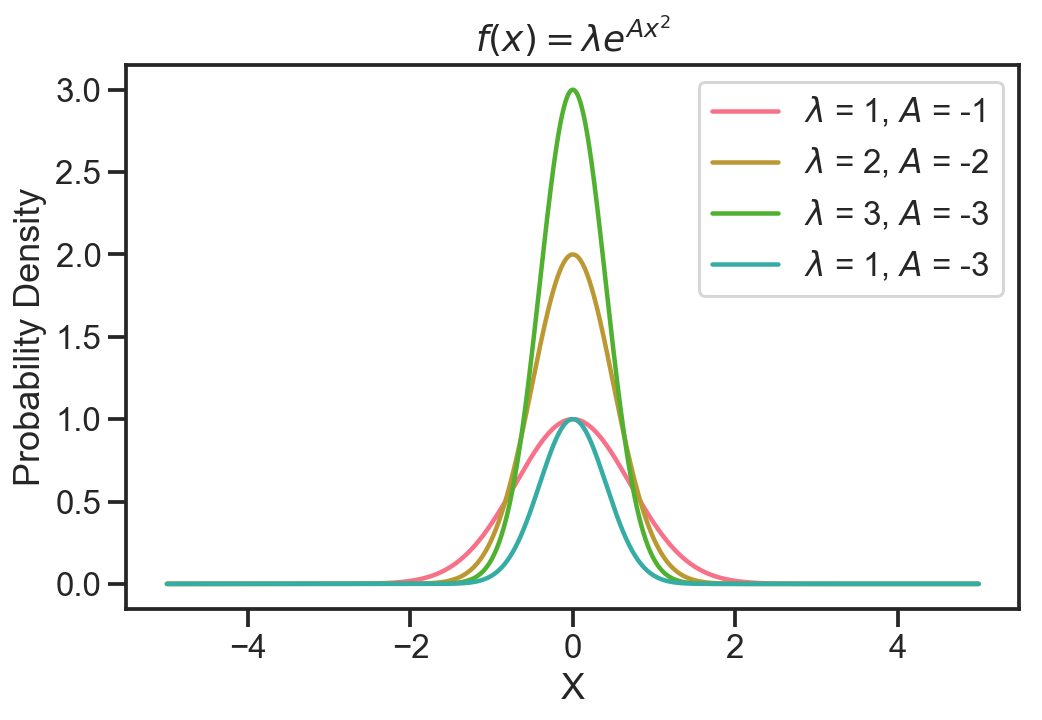

In [13]:
fig = plt.figure(figsize=(8,5))

def general_form_function(x, lam, a):
    return lam*np.exp(a*x**2)

lambda_ = [1,2,3,1]
A = [-1,-2,-3,-3]
x_axis = np.arange(-5, 5, 0.001)
legend = []

for lam, a in zip(lambda_, A):
    plt.plot(x_axis, general_form_function(x_axis, lam, a))
    legend.append(f'$\lambda$ = {lam}, $A$ = {a}')
plt.xlabel('X')
plt.ylabel('Probability Density')
plt.title('$f(x) = \lambda e^{Ax^2}$')
plt.legend(legend)

plt.show()

### 2.1.2 Solve for Constants
At this point we have done the vast majority of the conceptual work needed for this proof. We have found general class of functions that can be parameterized in order to yield the proper probability density function based on our assumptions and constraints assigned earlier. The main piece that is left is merely cosmetic, and that is finding the constants $A$ and $\lambda$. 

The first thing to note is that we are always going to want $A$ to be a negative number. This is because if $A$ is positive then we have $e$ raised to a positive number, which is going to cause our equation to blow up to $\infty$. This is clearly not what we want when dealing with probabilities. 

To ensure that $A$ always negative, we can redefine $A$ as:

$$A = -h^2$$

Where $h$ is just some number. The squaring operation ensures that the number is always positive, and then we negate that positive number to ensure $A$ is negative. We can then redefine $f$ as:

$$f(x) = \lambda e^{-h^2x^2}$$

Now, even if we did not have the plotting capabilites that we do (from matplotlib), we could see that the above function is **even**, meaning:

$$f(x) = f(-x)$$

This means that our function will be symmetric about the y-axis. So, even without the plotting capabilities we have, we could reason that our function would be bell shaped, centered about the y-axis (bell shaped because we see that as $x \rightarrow \infty$, $f(x) \rightarrow 0$. 

We have an additional constraint, namely that the total area under our curve must be equal to 1. This can be written mathematically as:

$$\int _{-\infty}^{\infty}f(x) dx = 1$$

What we will see is that the total number of unknowns is going to be reduced to 1 (we currently have 2, $\lambda$ and $h$). We can rewrite the above as:

$$\lambda \int _{-\infty}^{\infty}e^{-h^2 x^2} dx = 1$$

At this point we can perform **u-substitution**:

$$u = hx$$

$$du = h dx$$

$$dx = \frac{du}{h}$$

Which then allows us to substitute $u$ in:

$$\frac{\lambda}{h} \int _{-\infty}^{\infty}e^{-u^2} du = 1$$

Now, the integral above is very famous; it is known as the **Gaussian Integral**. At the risk of making this post to long I am going to derive it, since I find it very enlightening when trying to intuit where all terms in the final normal equation originate from.

#### 2.1.2.1 Gaussian Integral Derivation
Right from the get go it is clear that this integral is trying to evaluate a curve that has the exact shape of the normal distribution. We have our constants outside of the integral, so we can ignore them, leaving us with the evaluation of:

$$ \int _{-\infty}^{\infty}e^{-u^2} du = 1$$

For the sake of clarity, and _just for this derivation_, I am going to use $x$ instead of $u$, since it is purely a choice of nomenclature and will make it easier to follow. However, once we have derived it know that we would have come to the exact same conclusion if we had used $u$; it is simply a naming convention:

$$ \int _{-\infty}^{\infty}e^{-x^2} dx = 1$$

To start, we can define our integral as follows:

$$I = \int _{-\infty}^{\infty}e^{-x^2} dx$$

Now, in order to find what $I$ is we can look at a very similar integral, namely:

$$\int _{-\infty}^{\infty} \int _{-\infty}^{\infty}e^{-(x^2 + y^2)} dy dx$$

If we look at the particular function that we are performing a double integral over, we see it is:

$$e^{-(x^2 + y^2)}$$

This can be rewritten as:

$$e^{-x^2} e^{-y^2}$$

We can then look at the inner integral:

$$I^2 = \int _{-\infty}^{\infty} \overbrace{\int _{-\infty}^{\infty}e^{-x^2} e^{-y^2} dy}^\text{First integral wrt y} dx$$

Now, this inner integral is taken with respect to $y$. This means that the $e^{-x^2}$ portion is not going to effect the integral in any way. This allows us to take this bit as a constant and pull it outside of the integral:

$$e^{-x^2} \int _{-\infty}^{\infty} e^{-y^2} dy$$

This leaves us with integral $\int _{-\infty}^{\infty} e^{-y^2} dy$, which can be evaluated somehow, yielding a number; i.e. yielding a constant: 

$$\int _{-\infty}^{\infty} e^{-y^2} dy = constant$$

We can then put our other integral back in, keeping in mind that the integral above will just yield a constant:

$$\int _{-\infty}^{\infty} e^{-x^2} \overbrace{ \int _{-\infty}^{\infty} e^{-y^2} dy }^\text{Evaluates to a constant} dx$$

Because the inner portion evaluates to a constant we can move it outside of the outer integral:

$$\overbrace{ \int _{-\infty}^{\infty} e^{-y^2} dy }^\text{Integral 1} \overbrace{ \int _{-\infty}^{\infty} e^{-x^2} dx} ^\text{Integral 2}$$

Now, integral 2, above, will just be equal to $I$ as we defined earlier. Integral 1 will also be equal to $I$, because it is the same integral-we are simply writing everything in terms of $y$! If we recall the integral we defined earlier, we now see that it is simply equal to $I^2$:

$$I^2 = \int _{-\infty}^{\infty} \int _{-\infty}^{\infty}e^{-(x^2 + y^2)} dy dx$$

So, to recap, we are interested in this integral:

$$I = \int _{-\infty}^{\infty}e^{-x^2} dx$$

And in order to find it, we simply need to find the answer to the integral:

$$I^2 = \int _{-\infty}^{\infty} \int _{-\infty}^{\infty}e^{-(x^2 + y^2)} dy dx$$

And then take the square root of it in order to get $I$! Surprisingly, the above integral is much easier to solve than our original. To get an idea of what this multivariate function looks like, we can plot it below:

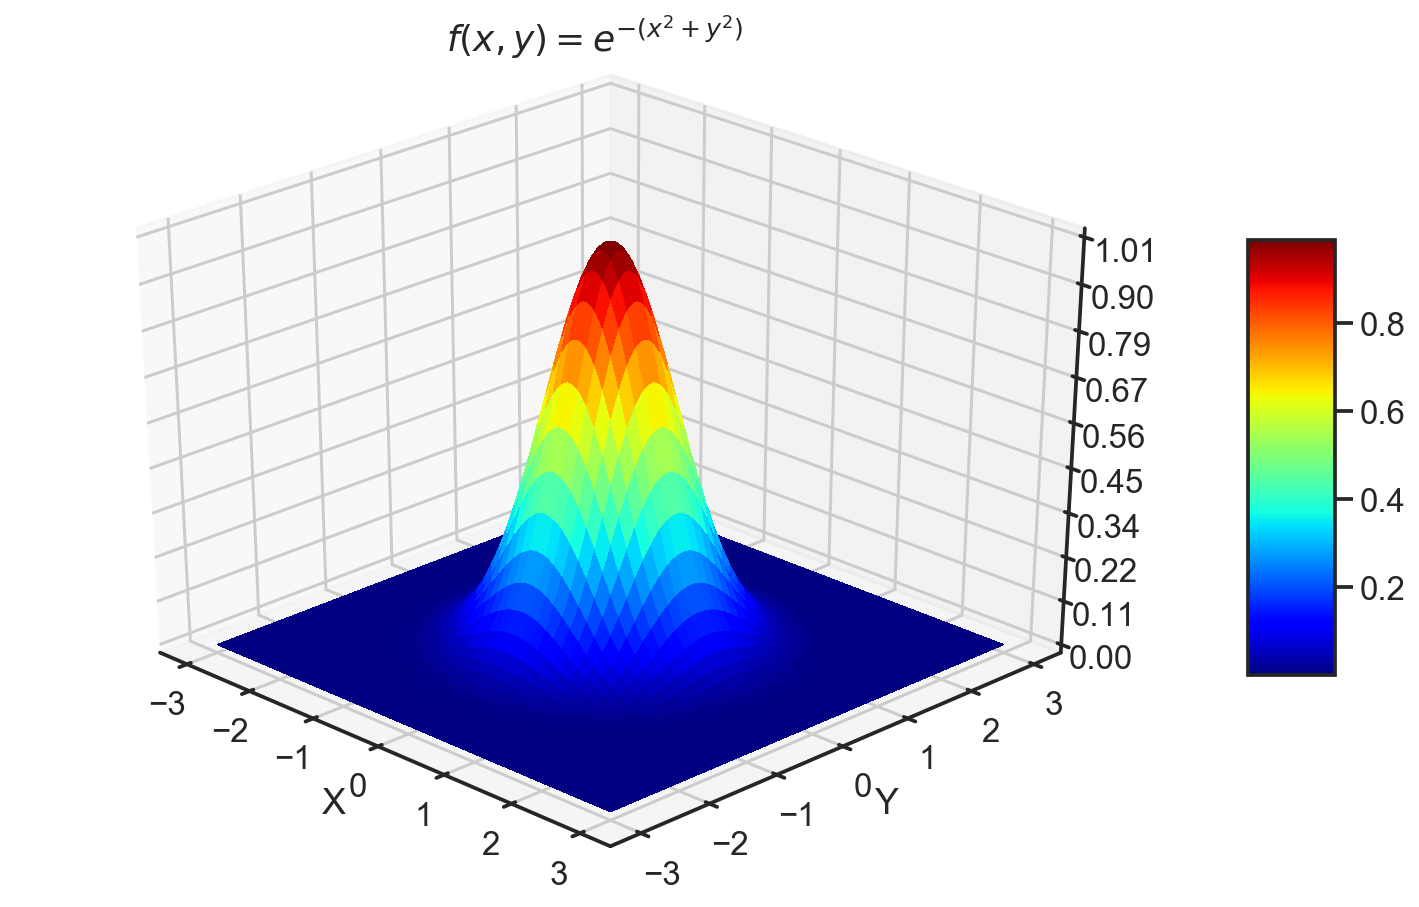

In [44]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

fig = plt.figure(figsize=(13,8))
ax = fig.gca(projection='3d')

# Make data.
X = np.arange(-3, 3, 0.001)
Y = np.arange(-3, 3, 0.001)
X, Y = np.meshgrid(X, Y)
Z = np.exp(-(X**2 + Y**2))

# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap=cm.jet,
                       linewidth=0, antialiased=False)

# Customize the z axis.
ax.set_zlim(0, 1.01)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)
ax.view_init(azim=-45)

# Labels
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_title('$f(x,y) = e^{-(x^2 + y^2)}$', pad="20")

plt.show()

What we see above is that we are now dealing with a 3 dimensional bell shaped curve. The goal with the above integral is to find the **volume** underneath the 3 dimensional curve. Now, the way that we are going to be finding the volumen under this bell shaped integral is rather interesting! 